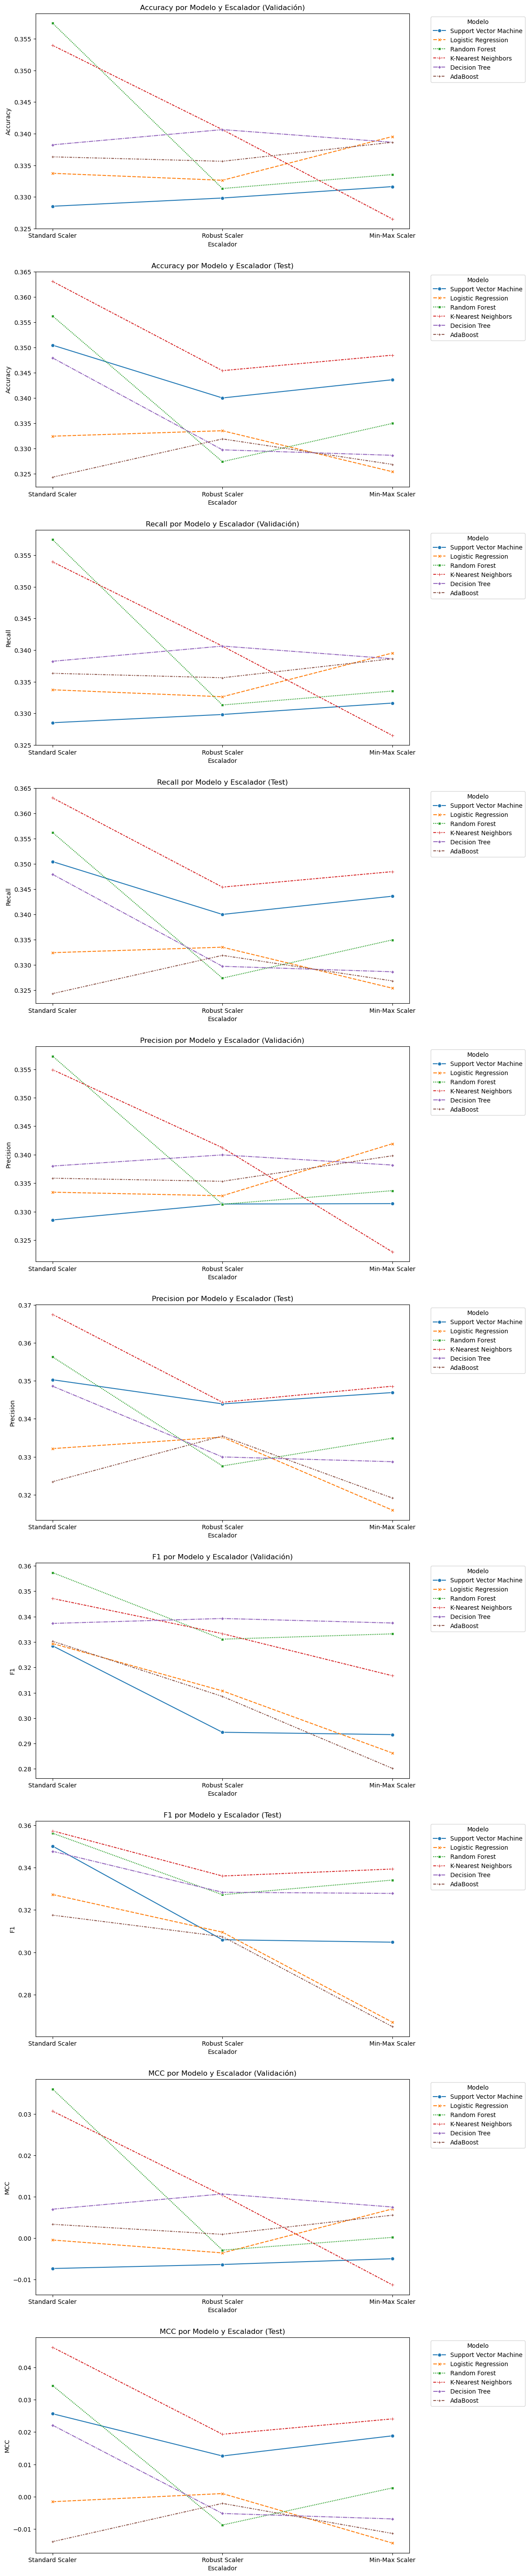

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los resultados de la evaluación de los modelos
results_df = pd.read_csv('../results/metrics.csv')

# Lista de métricas a graficar
metrics = ['Accuracy', 'Recall', 'Precision', 'F1', 'MCC']

# Crear una figura con subgráficos (dos filas por métrica)
fig, axes = plt.subplots(nrows=len(metrics) * 2, ncols=1, figsize=(12, 12 * len(metrics)))
fig.tight_layout(pad=5.0)

for i, metric in enumerate(metrics):
    # Filtrar el DataFrame para la métrica actual y el dataset (Validación/Test)
    for j, dataset in enumerate(['Validación', 'Test']):
        ax = axes[i * 2 + j]
        metric_df = results_df[results_df['Dataset'] == dataset][['Modelo', 'Escalador', metric]]
        
        # Crear un gráfico de líneas para la métrica actual y el dataset
        sns.lineplot(data=metric_df, x='Escalador', y=metric, hue='Modelo', style='Modelo', markers=True, ax=ax)
        
        ax.set_title(f'{metric} por Modelo y Escalador ({dataset})')
        ax.set_xlabel('Escalador')
        ax.set_ylabel(metric)
        ax.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para que las leyendas no se superpongan
plt.subplots_adjust(right=0.8)
# Mostrar los gráficos
plt.show()
